Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB
None



First Few Rows:
                                 Title Available Globally? Release Date  \
0            The Night Agent: Season 1                 Yes   2023-03-23   
1            Ginny & Georgia: Season 2                 Yes   2023-01-05   
2   The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   2022-12-30   
3                  Wednesday: Season 1                 Yes   2022-11-23   
4  Queen Charlotte: A Bridgerton Story        

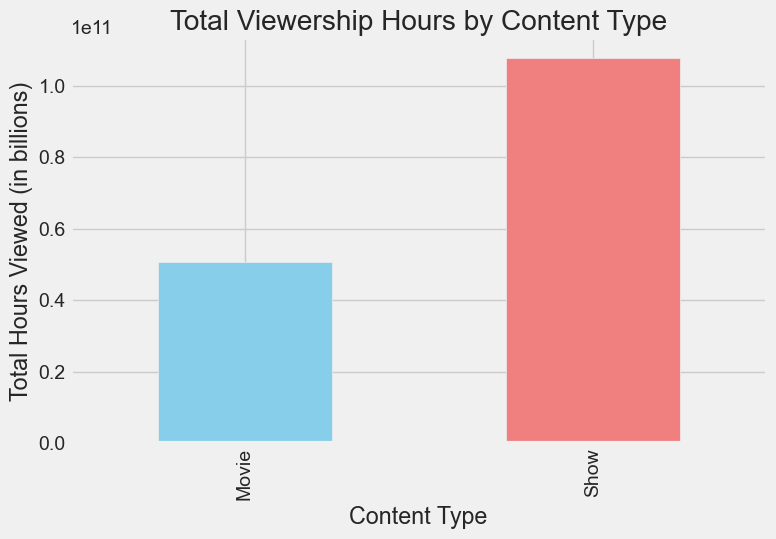

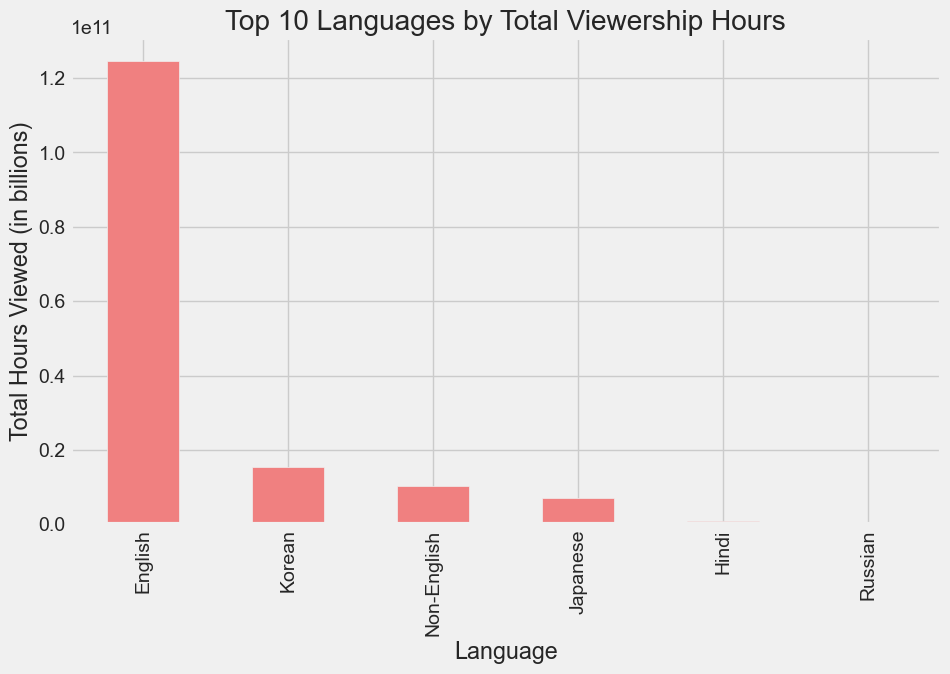

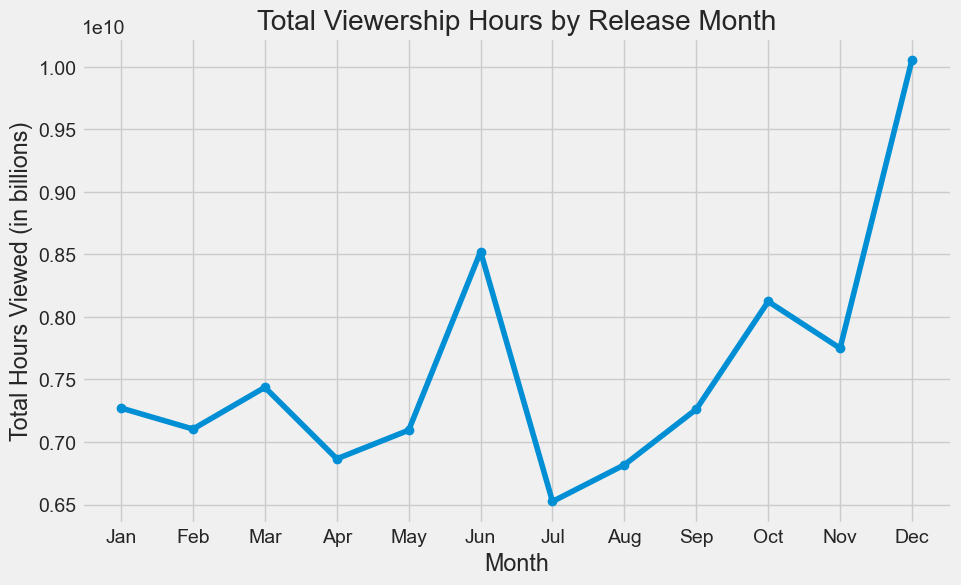



Top 5 Most-Watched Titles:
                                                 Title  Hours Viewed  \
0                            The Night Agent: Season 1   812100000.0   
1                            Ginny & Georgia: Season 2   665100000.0   
18227  King the Land: Limited Series // 킹더랜드: 리미티드 시리즈   630200000.0   
2                   The Glory: Season 1 // 더 글로리: 시즌 1   622800000.0   
18214                              ONE PIECE: Season 1   541900000.0   

      Language Indicator Content Type Release Date  
0                English         Show   2023-03-23  
1                English         Show   2023-01-05  
18227             Korean        Movie   2023-06-17  
2                 Korean         Show   2022-12-30  
18214            English         Show   2023-08-31  




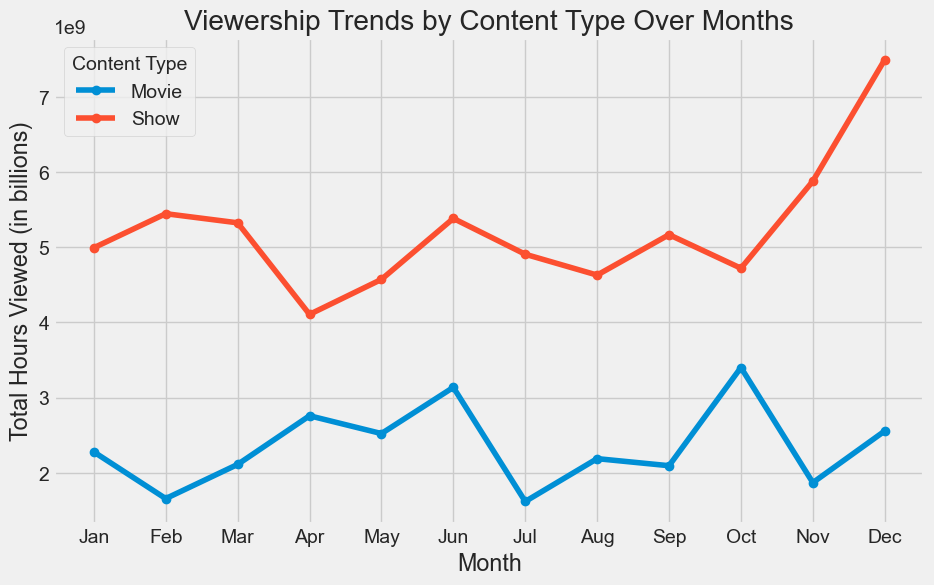

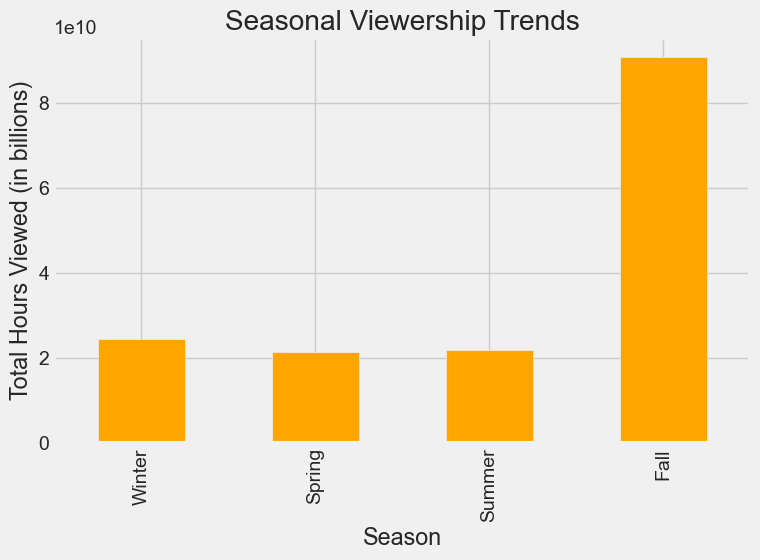

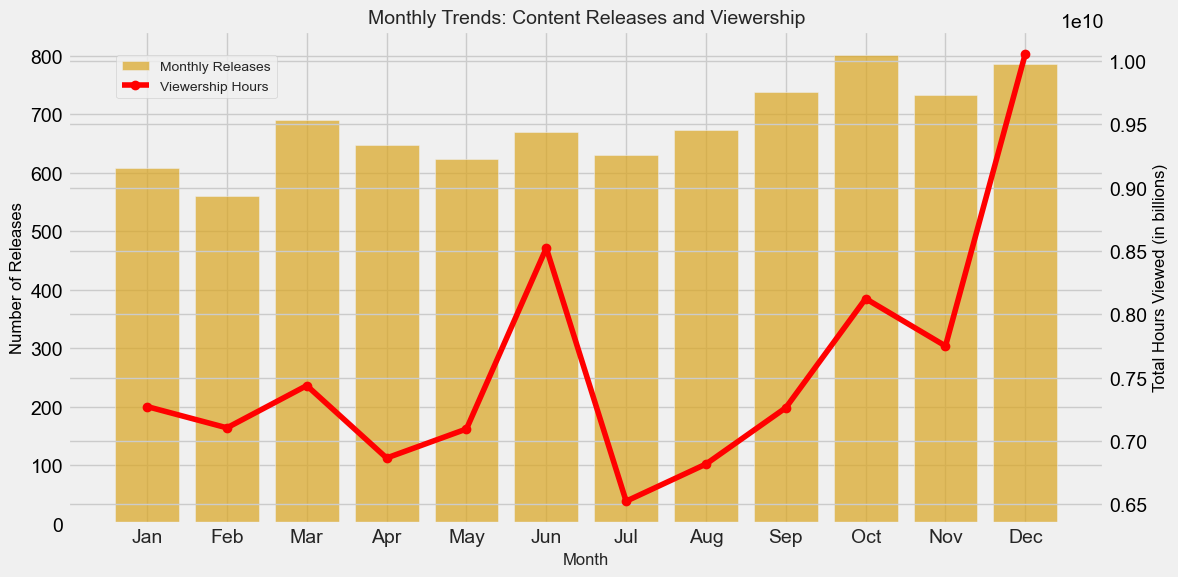

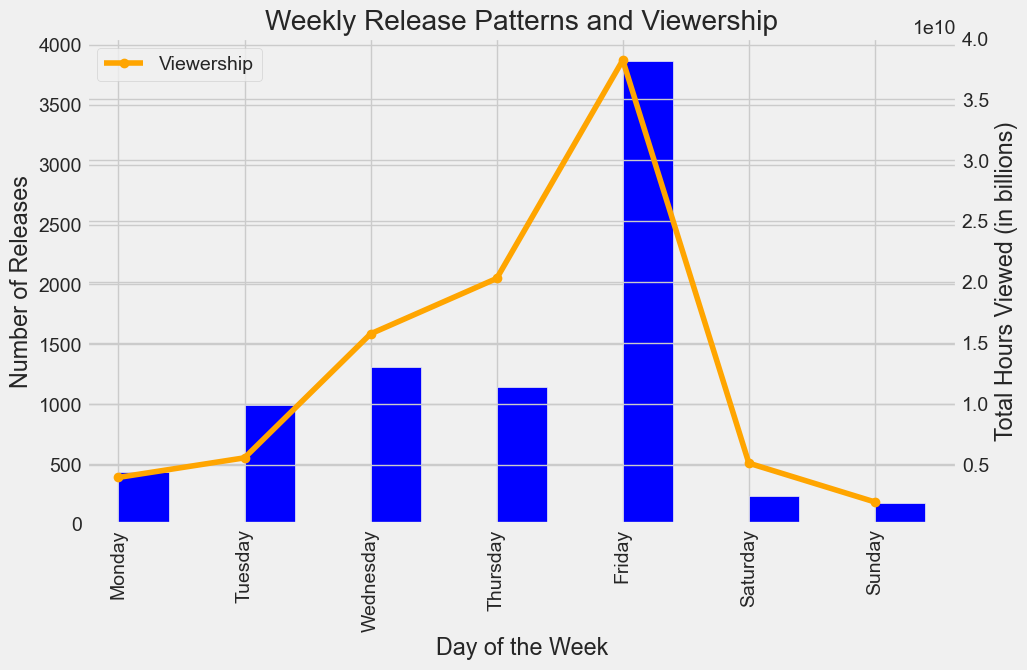



Releases Near Holidays:
                                                   Title Release Date  \
2                     The Glory: Season 1 // 더 글로리: 시즌 1   2022-12-30   
6                             La Reina del Sur: Season 3   2022-12-30   
11                          Kaleidoscope: Limited Series   2023-01-01   
29                               Perfect Match: Season 1   2023-02-14   
124    Lady Voyeur: Limited Series // Olhar Indiscret...   2022-12-31   
...                                                  ...          ...   
22324                      The Romantics: Limited Series   2023-02-14   
22327            Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5   2023-02-16   
22966  The Lying Life of Adults: Limited Series // La...   2023-01-04   
22985  Community Squad: Season 1 // División Palermo:...   2023-02-17   
24187                       Live to Lead: Limited Series   2022-12-31   

       Hours Viewed  
2       622800000.0  
6       429600000.0  
11      252500000.0  
29      1

In [32]:
# Netflix Content Strategy Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Load the Netflix dataset
netflix_data = pd.read_csv('netflix_content_2023.csv')

# Inspect the dataset
print("Data Overview:")
print(netflix_data.info())
print('\n')
print("\nFirst Few Rows:")
print(netflix_data.head())
print('\n')
netflix_data['Hours Viewed'] = netflix_data['Hours Viewed'].str.replace(',', '').astype(float)

content_type_viewership = netflix_data.groupby('Content Type')['Hours Viewed'].sum()
content_type_viewership.plot(kind='bar', color=['skyblue', 'lightcoral'], figsize=(8, 5))
plt.title('Total Viewership Hours by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Total Hours Viewed (in billions)')
plt.show()
print('\n')
# Analyze viewership by language
language_viewership = netflix_data.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False)
language_viewership.head(10).plot(kind='bar', color='lightcoral', figsize=(10, 6))
plt.title('Top 10 Languages by Total Viewership Hours')
plt.xlabel('Language')
plt.ylabel('Total Hours Viewed (in billions)')
plt.show()
print('\n')
# Analyze trends over release dates
netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'])
netflix_data['Release Month'] = netflix_data['Release Date'].dt.month
monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()

monthly_viewership.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Total Viewership Hours by Release Month')
plt.xlabel('Month')
plt.ylabel('Total Hours Viewed (in billions)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()
print('\n')
# Analyze the top 5 most-watched titles
top_5_titles = netflix_data.nlargest(5, 'Hours Viewed')
print("Top 5 Most-Watched Titles:")
print(top_5_titles[['Title', 'Hours Viewed', 'Language Indicator', 'Content Type', 'Release Date']])
print('\n')
# Viewership trends by content type over months
monthly_viewership_by_type = netflix_data.groupby(['Release Month', 'Content Type'])['Hours Viewed'].sum().unstack()
monthly_viewership_by_type.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Viewership Trends by Content Type Over Months')
plt.xlabel('Month')
plt.ylabel('Total Hours Viewed (in billions)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Content Type')
plt.grid(True)
plt.show()
print('\n')
# Seasonal viewership trends
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

netflix_data['Release Season'] = netflix_data['Release Month'].apply(get_season)
seasonal_viewership = netflix_data.groupby('Release Season')['Hours Viewed'].sum()
seasonal_viewership = seasonal_viewership.reindex(['Winter', 'Spring', 'Summer', 'Fall'])

seasonal_viewership.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('Seasonal Viewership Trends')
plt.ylabel('Total Hours Viewed (in billions)')
plt.xlabel('Season')

plt.show()
print('\n')
# Analyze monthly release patterns and viewership
monthly_releases = netflix_data['Release Month'].value_counts().sort_index()

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the bar chart for monthly releases
ax1.bar(monthly_releases.index, monthly_releases.values, color='goldenrod', alpha=0.7, label='Monthly Releases')
ax1.set_title('Monthly Trends: Content Releases and Viewership', fontsize=14)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Number of Releases', fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Create the secondary axis for the line chart
ax2 = ax1.twinx()
ax2.plot(monthly_viewership.index, monthly_viewership.values, color='red', marker='o', label='Viewership Hours')
ax2.set_ylabel('Total Hours Viewed (in billions)', fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add a combined legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=10)

plt.tight_layout()
plt.show()

# Weekly release patterns
netflix_data['Release Day'] = netflix_data['Release Date'].dt.day_name()
weekday_releases = netflix_data['Release Day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
weekday_viewership = netflix_data.groupby('Release Day')['Hours Viewed'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

weekday_releases.plot(kind='bar', color='blue', ax=ax1, position=0, width=0.4, label='Releases')
weekday_viewership.plot(kind='line', color='orange', marker='o', ax=ax2, label='Viewership')

ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Number of Releases')
ax2.set_ylabel('Total Hours Viewed (in billions)')
ax1.set_title('Weekly Release Patterns and Viewership')
plt.legend(loc='upper left')
plt.show()
print('\n')
important_dates = pd.to_datetime(['2023-01-01', '2023-02-14', '2023-07-04', '2023-10-31', '2023-12-25'])
holiday_releases = netflix_data[netflix_data['Release Date'].apply(
    lambda x: any((x - date).days in range(-3, 4) for date in important_dates)
)]
print("Releases Near Holidays:")
print(holiday_releases[['Title', 'Release Date', 'Hours Viewed']])

The Netflix content strategy for 2023 highlights several key trends:

Dominance of Shows: Shows consistently dominate viewership hours over movies, peaking significantly in December.

Language Popularity: English-language content leads viewership, while Korean content also plays a significant role, reflecting its global appeal.

Seasonal Trends: Fall emerges as the season with the highest viewership, suggesting strategic content releases during this time.

Release Patterns: Fridays are the most popular release day, strategically targeting audience engagement before the weekend.

Holiday Strategies: Netflix leverages major holidays to release impactful content, optimizing viewership during these periods.